# Plotting Climate Data

## What do seasonal temperatures actually look like?

Montrealers love to talk and complain about the weather. When there are vasts amounts of snow, Montrealers want Summer. When there's no snow, they complain that they can't go skiing. My hunch is that people are gnerally confused because, socially, we always refer to average values of temperature, snowfall, etc. We'll explore here if and how looking at averages can skew our understanding of climate.

You will use historical climate data for a specific weather station in Canada. Data can be downloaded for a number of stations, when available, in the date range spanning 1840-today at the web address http://climatedata.ca/download/

You can access the website manually, select a station, a date range, a file type, and download the file manually. Following that, you can upload the file to your files on the server and it will be accessible. This **will** be cumbersome. 

An easier way is to access the data through the api. Indeed, you can form the correct URL that will return the following data:
* station ID: 7086716 (Rouyn)
* Start date: Jan 1st 2020
* End date:   Dec 31st 2020
* File format: CSV

Look at the URL, saved as a string, in the climateDataURL variable. Can you identify the different parts that set that data?

In [1]:
climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime=2020-01-01%2000:00:00/2020-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0'

**Note:** If you use the URL this way, though, you will get all data available, but in a random order, which makes processing difficult later on. If we add the section '&properties=LOCAL_DAY,LOCAL_MONTH,LOCAL_YEAR,MIN_TEMPERATURE,MAX_TEMPERATURE' to the URL, you will get (for this example) the number of the day (1,2,3,4,5,6,...), the number of the month (1 = January, 2 = February, etc), the year, the day's minimum temperature and the day's maximum temperature. (We thought you also received that data in the same order every time, but that may not actually be the case.) The full information is here: https://api.weather.gc.ca/openapi?f=html#/climate-hourly/getClimate-hourlyFeatures

***Let's redefine the URL with that functionality.***

In [2]:
climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime=2020-01-01%2000:00:00/2020-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&properties=LOCAL_DATE,LOCAL_DAY,LOCAL_MONTH,LOCAL_YEAR,MIN_TEMPERATURE,MAX_TEMPERATURE&f=csv&limit=150000&startindex=0'

For python to be able to fetch, read, store, manipulate, and plot the data, we will load some modules:
* the requests module: to be able to fetch the data using the web-based API
* the function StringIO from the io module: this allows us to use the downloaded csv as if it was a file on disk
* the pandas module: to read the data and store it into a dataframe, a very useful data format that allows us to manipulate tables of data.
* the matplotlib.pyplot module: we will use it to represent the data graphically

Now, we'll use the 'urlread()' function that reads the url and returns as a string. In this case, the string is a CSV file that we can store in the 'data' variable. (Remove the ; character to see what you actually downloaded. Be ready to scroll a bit.)

In [3]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

Now, we'll use the get() function from the requests module to read the data from the URL.

In [4]:
data = requests.get(climateDataURL)

**Note**: Because the ordering is never constant, with matlab, we had to find the headers. Using the pandas module, we can simply call the data by column name. The actual text of the CSV is in the variable data.text and we can load it into a dataframe using pandas.

In [5]:
df = pd.read_csv(StringIO(data.text))

We can store the csv (from the 'data' variable) in a file. We don't need the file to work with the data, but it can be a good idea to store locally:
* storing the data received can help us check things later or debug our process;
* if the file is large, storing locally allows us to work with the data again later without having to transfer from the server;
* we can detect changes introduced by the server later on;
* etc.

Let's give this file a name.

In [6]:
CSVFileName = 'Rouyn-test-data-2020.csv'

Open the file and write.

In [7]:
with open(CSVFileName, 'w') as f:
    f.write(data.text)

A CSV file is basically a very simple version of an excel spreadsheet, and is very common for numerical data that is not too voluminous. In this case:
* day
* month
* year
* max Temperature of the day
* min Temperature of the day

Basically any tool that can work with a table of data should be able to write and read a CSV file. We previously stored the data in the pandas dataframe and called it df. We can access the data using the header of the columns. To get a list of the column headers, we can ask df.

In [8]:
df.columns

Index(['x', 'y', 'LOCAL_DAY', 'LOCAL_YEAR', 'LOCAL_DATE', 'MAX_TEMPERATURE',
       'MIN_TEMPERATURE', 'LOCAL_MONTH'],
      dtype='object')

What does the df dataframe itself look like? Let's have a look!

In [9]:
df

,x,y,LOCAL_DAY,LOCAL_YEAR,LOCAL_DATE,MAX_TEMPERATURE,MIN_TEMPERATURE,LOCAL_MONTH
0,-79.034167,48.245833,1,2020,2020-01-01 00:00:00,-2.5,-9.4,1
1,-79.034167,48.245833,2,2020,2020-01-02 00:00:00,0.7,-8.5,1
2,-79.034167,48.245833,3,2020,2020-01-03 00:00:00,1.1,-7.4,1
3,-79.034167,48.245833,4,2020,2020-01-04 00:00:00,-7.3,-12.0,1
4,-79.034167,48.245833,5,2020,2020-01-05 00:00:00,-11.1,-15.9,1
...,...,...,...,...,...,...,...,...
361,-79.034167,48.245833,27,2020,2020-12-27 00:00:00,-7.1,-17.3,12
362,-79.034167,48.245833,28,2020,2020-12-28 00:00:00,-7.1,-19.4,12
363,-79.034167,48.245833,29,2020,2020-12-29 00:00:00,-8.2,-21.8,12
364,-79.034167,48.245833,30,2020,2020-12-30 00:00:00,-5.0,-11.0,12


Looks like a pretty nice table. Let us now plot the daily maximum temperature (MAX_TEMPERATURE) and minimum temperatures (MIN_TEMPERATURES) for the year. What does a single column look like?

In [12]:
df["MAX_TEMPERATURE"]

0      -2.5
1       0.7
2       1.1
3      -7.3
4     -11.1
       ... 
361    -7.1
362    -7.1
363    -8.2
364    -5.0
365    -5.6
Name: MAX_TEMPERATURE, Length: 366, dtype: float64

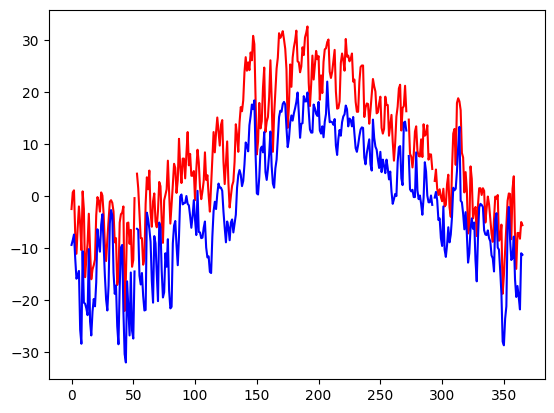

In [13]:
plt.plot(df["MAX_TEMPERATURE"],'r-',df["MIN_TEMPERATURE"],'b-')

Let's compare the year 2020 to the year 2000. *(It would be much easier if we'd created a function to fetch and extract the data instead of retyping everything here. Imagine if we tried to do this for 100 years!)*

In [14]:
climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime=2000-01-01%2000:00:00/2000-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0'

In [18]:
data2000 = requests.get(climateDataURL)
df2 = pd.read_csv(StringIO(data2000.text))

In [16]:
CSVFileName = 'Rouyn-test-data-2000.csv'

In [17]:
with open(CSVFileName, 'w') as f:
    f.write(data2000.text)

Let's now plot both the year 2000 and 2020 together.

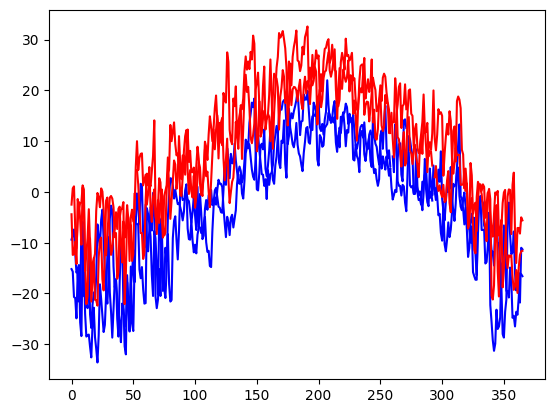

In [20]:
plt.plot(df["MIN_TEMPERATURE"],'b-',df2["MIN_TEMPERATURE"],'b-',df["MAX_TEMPERATURE"],'r-',df2["MAX_TEMPERATURE"],'r-')

Both years are plotted on top of each others because we didn't specify x values. As a default, plot() will plot the data sequentially, which here corresponds to the day of the year (since we asked for the data from Jan 1 of each year. However, the plot is unreadable. The lines all look the same and we can't tell which year is which.

This plot is not very legible. Let's look at just the daily highs first. We'll plot  as dots so we can start to see some kind of outline or envelope of possible temperatures for any given day.

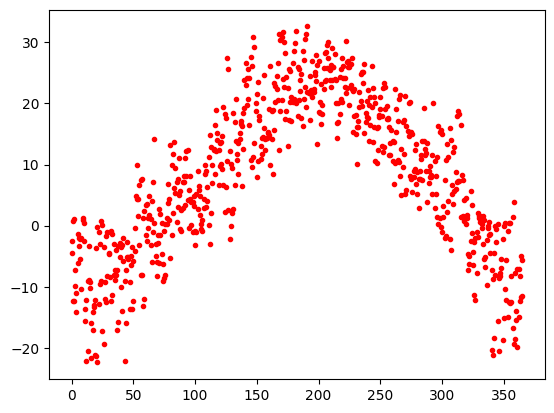

In [21]:
plt.plot(df["MAX_TEMPERATURE"],'r.',df2["MAX_TEMPERATURE"],'r.')

And now for the daily low temperatures.

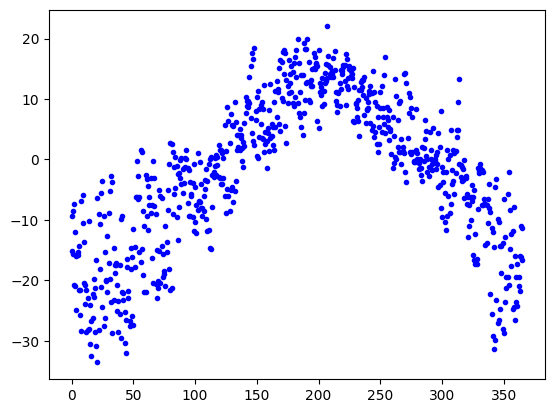

In [22]:
plt.plot(df["MIN_TEMPERATURE"],'b.',df2["MIN_TEMPERATURE"],'b.')

We're starting to see an envelope emerge of, statistically, what temperatures could occur on a given day. Could we now do this for a lot more years? What we're interested in is to see the variation of temperatures, historically, throughout seasons, but move away from looking at just the average temperature. We want to see what is statistically likely to happen.

**Question 1**: I consistently plotted the high temperatures in red and the low temperatures in blue, even when there was only one type of temperature in a given plot. Why do you think that is? What is the advantage of using such a colour scheme?

**Question 2**: Create a function that downloads historical climate data for a given station, treats the data so it's useful and returns only what we want, in this case the daily highs and lows.

**Question 3**: Using your function, plot the envelope of possible high/low temperatures throughout the year for your favourite place in Canada. Add all the plotting elements that you think should be there so the plot is as clear, precise and legible as possible.

## **Bonus Questions**

**Bonus 1**: Can you find the daily average temperature (the average of a day over several years, not the day's mean temperature) and compare it to the envelopes you computed. How misleading is it to look at the average temperature of a day to have an idea of how hot/cold a day should be. Do you think it makes sense for meteorologists on TV/radio programs to keep saying "We are expecting a high that's x degrees above/below the normal average today." Is it useful? How do you think that influences people's moods?

**Bonus 2**: If you use all temperatures for a number of years, you are plotting the envelope of all the temperatures that occurred. What would be a better, statistically significant metric? How would you compute the envelope of the temperatures that would occur 95% of the time on a given day? What statistical tool /test could you use?

**Bonus 3**: Using your answer from the *bonus 2* question, can you plot the 95% likelihood interval?

### Hints

**Hint**: to turn the script into a function, you want to have dynamic elements inside the URL themselves. You can use two functions in python.
* the function str() takes a value and turns it into a string. So if you specify year = 2015 (the number) and you want to get a file called "2015.html", you can turn the number 2015 into the string "2015" using str(year)
* you can combine pieces of text together by using the + sign. When you "add" strings together in python, you are concatenating. That means you are "squishing together" the two strings. E.g. "2015" + ".html" is equal to "2015.html".

In [30]:
year = 2015
'https://api.weather.gc.ca/' + str(year)+'.html'

'https://api.weather.gc.ca/2015.html'

**Hint**: To request only certain properties, you can add the following part to the URL of the api:

&properties=LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE,MIN_TEMPERATURE

The documentation of the api with that information is here:
https://api.weather.gc.ca/openapi?f=html#/climate-daily/getClimate-dailyFeatures

Compare the following two calls:

In [27]:
data = requests.get('https://api.weather.gc.ca/collections/climate-daily/items?datetime=2000-01-01%2000:00:00/2000-01-05%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0')
print(data.text)

x,y,CLIMATE_IDENTIFIER,TOTAL_RAIN_FLAG,DIRECTION_MAX_GUST,ID,SPEED_MAX_GUST,MAX_REL_HUMIDITY,MIN_TEMPERATURE_FLAG,DIRECTION_MAX_GUST_FLAG,LOCAL_YEAR,MIN_REL_HUMIDITY,SNOW_ON_GROUND_FLAG,MEAN_TEMPERATURE_FLAG,SNOW_ON_GROUND,LOCAL_MONTH,TOTAL_PRECIPITATION_FLAG,HEATING_DEGREE_DAYS,SPEED_MAX_GUST_FLAG,PROVINCE_CODE,TOTAL_SNOW_FLAG,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY_FLAG,MAX_TEMPERATURE_FLAG,MEAN_TEMPERATURE,LOCAL_DAY,TOTAL_PRECIPITATION,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_SNOW,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_DATE,TOTAL_RAIN,MIN_TEMPERATURE,STATION_NAME
-79.03416666666666,48.24583333333333,7086716,M,28,7086716.2000.1.1,35,90,,,2000,78,,,,1,,27.8,,QC,M,,,,-9.8,1,3.6,,,,0,-4.4,2000-01-01 00:00:00,,-15.2,ROUYN
-79.03416666666666,48.24583333333333,7086716,M,5,7086716.2000.1.2,41,84,,,2000,77,,,,1,,32.1,,QC,M,,,,-14.1,2,8.2,,,,0,-12.4,2000-01-02 00:00:00,,-15.7,ROUYN
-79.03416666666666,48.24583333333333,7086716,M,0,7086716.2000.1.3,0,83,,,2000,62,,,,1,,34.5,,QC

In [28]:
data = requests.get('https://api.weather.gc.ca/collections/climate-daily/items?datetime=2000-01-01%2000:00:00/2000-01-05%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&properties=LOCAL_DATE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE,MEAN_TEMPERATURE,MIN_TEMPERATURE&f=csv&limit=150000&startindex=0')
print(data.text)

x,y,LOCAL_DAY,MIN_TEMPERATURE,LOCAL_DATE,LOCAL_MONTH,MAX_TEMPERATURE,MEAN_TEMPERATURE,LOCAL_YEAR
-79.03416666666666,48.24583333333333,1,-15.2,2000-01-01 00:00:00,1,-4.4,-9.8,2000
-79.03416666666666,48.24583333333333,2,-15.7,2000-01-02 00:00:00,1,-12.4,-14.1,2000
-79.03416666666666,48.24583333333333,3,-20.7,2000-01-03 00:00:00,1,-12.3,-16.5,2000
-79.03416666666666,48.24583333333333,4,-20.9,2000-01-04 00:00:00,1,-9.8,-15.4,2000
-79.03416666666666,48.24583333333333,5,-24.9,2000-01-05 00:00:00,1,-14.2,-19.6,2000



**Hint**: Structures in python are made with spacing (indentation). To make a function, you define it using the keyword *def* followed by the function name, followed by the inputs (in brackets) and a colon ":". The outputs are returned with the keyword *return*. For example, a function that takes a year and a station ID to return the CSV text would look like the following:

In [39]:
def myFunction(year, stationID,):
    climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime='+ str(year) +'-01-01%2000:00:00/'+str(year)+'-12-31%2000:00:00&STN_ID='+str(stationID)+'&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&properties=LOCAL_DATE,LOCAL_DAY,LOCAL_MONTH,LOCAL_YEAR,MIN_TEMPERATURE,MAX_TEMPERATURE&f=csv&limit=150000&startindex=0'
    data = requests.get(climateDataURL)
    return data.text

Use the function as follows:

In [40]:
print(myFunction(2000,10849))

x,y,MAX_TEMPERATURE,MIN_TEMPERATURE,LOCAL_MONTH,LOCAL_YEAR,LOCAL_DAY,LOCAL_DATE
-79.03416666666666,48.24583333333333,-4.4,-15.2,1,2000,1,2000-01-01 00:00:00
-79.03416666666666,48.24583333333333,-12.4,-15.7,1,2000,2,2000-01-02 00:00:00
-79.03416666666666,48.24583333333333,-12.3,-20.7,1,2000,3,2000-01-03 00:00:00
-79.03416666666666,48.24583333333333,-9.8,-20.9,1,2000,4,2000-01-04 00:00:00
-79.03416666666666,48.24583333333333,-14.2,-24.9,1,2000,5,2000-01-05 00:00:00
-79.03416666666666,48.24583333333333,-1.4,-15.8,1,2000,6,2000-01-06 00:00:00
-79.03416666666666,48.24583333333333,-3.3,-21.6,1,2000,7,2000-01-07 00:00:00
-79.03416666666666,48.24583333333333,-2.2,-21.6,1,2000,8,2000-01-08 00:00:00
-79.03416666666666,48.24583333333333,-2.1,-6.9,1,2000,9,2000-01-09 00:00:00
-79.03416666666666,48.24583333333333,1.3,-5.9,1,2000,10,2000-01-10 00:00:00
-79.03416666666666,48.24583333333333,0.5,-13.6,1,2000,11,2000-01-11 00:00:00
-79.03416666666666,48.24583333333333,-13.6,-24,1,2000,12,2000-01-12 00:0